# Análisis exploratorio de datos

Hecho por **Alain Cascán** y **Daniel Herce**

## Descripción del dataset: Hotel Bookings

El dataset **Hotel Bookings** de Kaggle contiene información sobre más de 119.000 reservas en dos tipos de hoteles: **City Hotel** y **Resort Hotel**.  
Cada fila representa una reserva con variables como fecha de llegada, duración de la estancia, número de huéspedes, tipo de cliente, país de origen, tarifa diaria promedio y si la reserva fue cancelada.

**Link:** [Hotel Booking Demand Dataset en Kaggle](https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand)


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


## Importación de librerías y creación del DataFrame

Primero se importan las librerías necesarias y se carga el dataset en un DataFrame utilizando **pandas**.


In [3]:
df = pd.read_csv('hotel_bookings.csv',delimiter=',')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


## Preprocesamiento de los datos

Una vez cargado el dataset, se realiza el **preprocesamiento** para preparar la información antes del análisis.  
Este paso incluye la revisión de valores nulos, el tratamiento de variables categóricas y la eliminación de columnas irrelevantes.  

Se define una función para calcular el número de valores nulos por columna y su porcentaje respecto al total de filas.  
Esto permite identificar rápidamente las variables que requieren limpieza o imputación.

In [6]:
def check_nulls(dataframe):
    nulls = dataframe.isnull().sum()
    pct_null = (nulls / dataframe.shape[0]) * 100
    missing_summary = pd.DataFrame({
        "n_nulls": nulls,
        "percent_null": pct_null
    })
    missing_summary = missing_summary[missing_summary["n_nulls"] > 0]
    return missing_summary[missing_summary > 0]

check_nulls(df)


,n_nulls,percent_null
children,4,0.003350
country,488,0.408744
agent,16340,13.686238
company,112593,94.306893


Se identifican **cuatro columnas con valores nulos**:  
- `children`  
- `country`  
- `agent`  
- `company`  

La columna **`company`** presenta aproximadamente un **94% de valores nulos**, lo que la hace no informativa. Dado su alto porcentaje de ausencia, esta variable introduce ruido y debe eliminarse del conjunto de datos.

La columna **`agent`** contiene un **86,32% de valores no nulos**, pero su información no es relevante para el objetivo del análisis, que se centra en el comportamiento del cliente. Por tanto, se descarta también esta variable.

Las columnas **`children`** y **`country`** son relevantes y presentan un porcentaje bajo de valores nulos.  

- Para **`children`**, se sustituirán los valores nulos con **0**, ya que este es el valor más frecuente y su sustitución no introduce sesgo significativo.  
- Para **`country`**, se eliminarán las filas con valores nulos. No se sustituirá por un valor arbitrario (por ejemplo, *unknown*) debido a que:  
  1. No existe una base lógica para asignar un país faltante.  
  2. La sustitución no aporta información útil.  
  3. Las filas afectadas representan menos del **1%** del total, por lo que su eliminación tiene un impacto mínimo en el análisis.


In [7]:
df.drop(columns=['company', 'agent'], inplace=True) # Eliminar columnas con muchos valores nulos, ya que no aportan información relevante
df.fillna({'children': 0}, inplace=True) # Rellenar valores nulos en la columna 'children' con 0
df.dropna(inplace=True) # Eliminar filas con valores nulos en otras columnas

In [8]:
check_nulls(df) # Verificar que no quedan valores nulos

,n_nulls,percent_null


## Análisis gráfico de las variables categóricas y numéricas

En esta sección se representan gráficamente las principales variables del conjunto de datos para analizar su distribución y comportamiento.

In [9]:
def find_categorical_and_numerical_columns(df): #Clasificamos las columnas en categóricas y numéricas
    categorical = df.select_dtypes(include=['object', 'category']).columns.tolist()
    numerical = df.select_dtypes(include=['number']).columns.tolist()
    return categorical, numerical

categorical_cols, numerical_cols = find_categorical_and_numerical_columns(df) 
print("Categorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)

Categorical Columns: ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_date']
Numerical Columns: ['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']


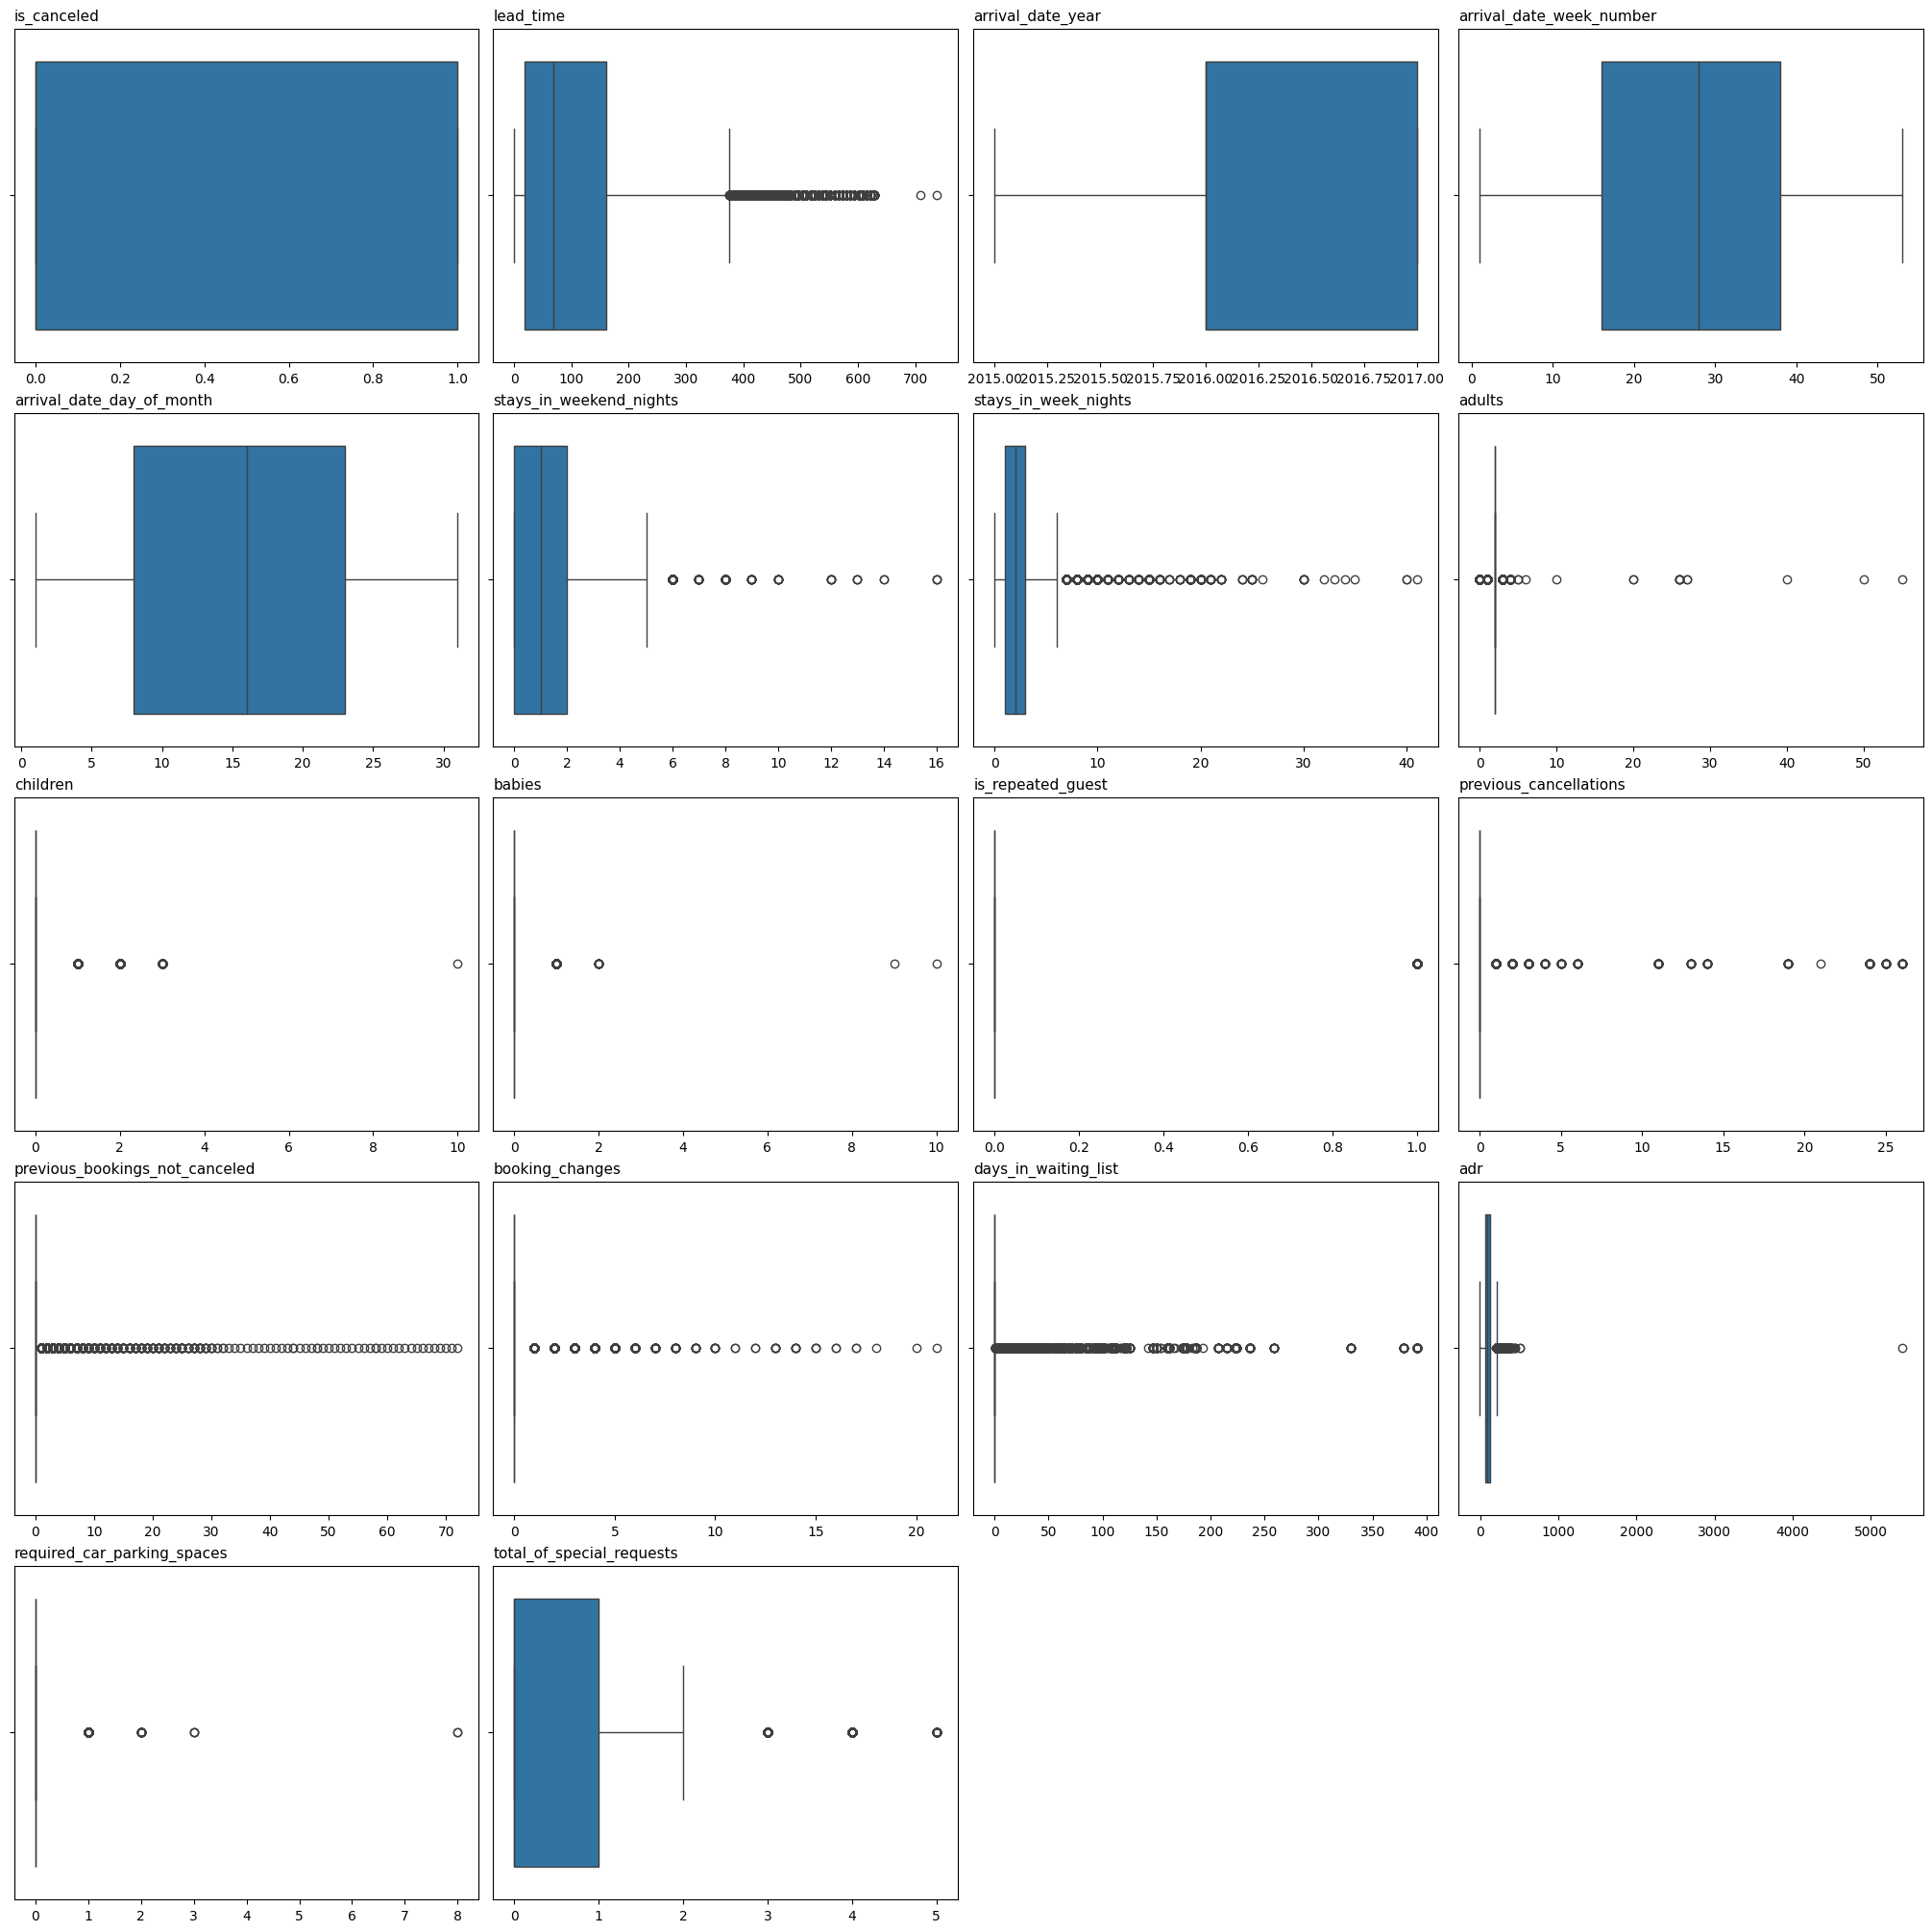

In [10]:
n_cols = 4
n_rows = int(np.ceil(len(numerical_cols)/n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4*n_rows), constrained_layout=True)
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    ax = axes[i]
    sns.boxplot(x=df[col], orient='h', ax=ax, showfliers=True)  # horizontal y sin puntos de outlier
    ax.set_title(col, loc='left', fontsize=11)
    ax.set_xlabel("")  # más limpio

# eliminar ejes vacíos
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

In [11]:
df[numerical_cols].describe()


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000
mean,0.371373,104.308027,2016.157617,27.166726,15.800567,0.928891,2.502136,1.858404,0.104203,0.007948,0.032010,0.087139,0.131629,0.221174,2.330676,102.000808,0.061883,0.571706
std,0.483174,106.903127,0.707479,13.589774,8.780371,0.996211,1.900165,0.578576,0.399166,0.097379,0.176026,0.845855,1.484647,0.652775,17.630161,50.487004,0.244168,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


In [12]:
atipical_cols = ['lead_time','adults','children','babies','previous_cancellations','previous_bookings_not_cancelled','days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests']

